In [3]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("gamma-ray.csv")

df['rate'] = df['count']/df['seconds']

<AxesSubplot:xlabel='rate', ylabel='Count'>

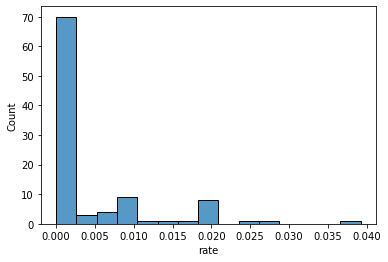

In [5]:
sns.histplot(data=df, x="rate")

In [6]:
df['count'].sum()/df['seconds'].sum()

0.0038808514969907496

In [7]:
df['count'].mean()

0.61

In [8]:
(0.0042 - 0.004206852295946855)/0.004206852295946855

-0.001628841581497262

In [9]:
#Importing libraries
import numpy as np
from scipy.stats import chi2, binom, poisson

# Maximum likelihood estimator and Probability Mass Function for the treatment set under the alternative hypothesis (HA): pMLE_T diff pMLE_C
L_HA = 1
for k_i, t_i in zip(df['count'].values, df['seconds'].values): 
    pmf_i = poisson.pmf(k=k_i, mu=k_i/t_i)
    L_HA *= pmf_i

# Maximum likelihood estimator and Probability Mass Function for the control / treatment set under the null hypothesis (H0): pMLE_T = pMLE_C = pMLE
L_H0 = 1
for k_i, t_i in zip(df['count'].values, df['seconds'].values): 
    pmf_i = poisson.pmf(k=k_i, mu=df['count'].sum()/df['seconds'].sum())
    L_H0 *= pmf_i

# Calculating the likelihood ratio test statistic
LR_stat = -2*np.log(L_H0/L_HA)
print(f"The likelihood ratio test statistic is {LR_stat}")

# Calculating p-value assuming a Chi-Squared distribution for LR_stat
pvalue = 1 - chi2.cdf(x=LR_stat, df=99)
print(f"The p-value is {pvalue}")

The likelihood ratio test statistic is 104.33272117042188
The p-value is 0.337398546433923


In [10]:
1-chi2.cdf(x=123.2252, df=99)

0.05000013599602504

In [11]:
golub_data = pd.read_csv("golub.csv",  index_col='Unnamed: 0')

In [12]:
import math


all_arr = golub_data[golub_data.columns[0:27]].values
aml_arr = golub_data[golub_data.columns[27:]].values

all_mu_arr = np.mean(all_arr, axis=1)
aml_mu_arr = np.mean(aml_arr, axis=1)

all_var_arr = np.var(all_arr, axis=1)/all_arr.shape[1]
aml_var_arr = np.var(aml_arr, axis=1)/aml_arr.shape[1]

tw = (all_mu_arr - aml_mu_arr)/np.sqrt(all_var_arr + aml_var_arr)

dfw = ((all_var_arr + aml_var_arr)**2)/((1/(all_arr.shape[1]-1))*all_var_arr**2 + (1/(aml_arr.shape[1]-1))*aml_var_arr**2)
#dfw = np.array([math.floor(dfw_i) for dfw_i in dfw])

In [13]:
#Importing libraries
import numpy as np
from scipy.stats import chi2, binom, poisson, t

counter = 0
p_values = []
for tw_i, dfw_i in zip(tw, dfw):
    p_value = 1-t.cdf(x=np.abs(tw_i), df=dfw_i, loc=0, scale=1)
    p_values.append(p_value)
    if(p_value < 0.025):
        counter += 1

counter

1131

In [14]:
p_values_increasing = sorted(ps)

NameError: name 'ps' is not defined

In [ ]:
m = len(p_values_increasing)
count = 0
alpha = 0.025
for i, p_value_i in enumerate(p_values_increasing):
    if(p_value_i*(m - (i+1-1)) <= alpha):
        count += 1
    else:
        break
count

89

In [ ]:
from statsmodels.stats import multitest, weightstats

In [ ]:
ps = []
for i in range(golub_data.shape[0]):
    t, p, df = weightstats.ttest_ind(x1=all_arr[i,:], x2=aml_arr[i,:], alternative='two-sided', usevar='unequal')
    ps.append(p)

In [ ]:
res = multitest.multipletests(pvals=ps, alpha=0.025, method='fdr_bh', is_sorted=False, returnsorted=True)

In [ ]:
np.sum(res[0])

540

In [16]:
Xraw = pd.read_csv("syn_X.csv", header=None)
yraw = pd.read_csv("syn_y.csv", header=None)

In [17]:
# Creating X vector
X = np.concatenate([
    np.ones(shape=(Xraw.shape[0],1)), 
    Xraw.values[:,0].reshape((Xraw.shape[0],1)),
    Xraw.values[:,1].reshape((Xraw.shape[0],1))
], axis=1)

# Creating y vector
y = yraw.values.reshape((Xraw.shape[0],1))

# Calculating Beta
beta = np.linalg.inv(X.T@X)@X.T@y

# Printing Beta
print(beta[:,0])

[ 1.92960603  1.26397096 -4.59799331]


In [96]:
def gradient_descent(X, y, step_size, precision, beta):
    
    j_k = 0
    beta_i = np.zeros((X.shape[1], 1))
    error = np.max(np.abs(beta-beta_i))
    m = X.shape[0]

    count = 0

    while (error > precision):

        j_i = np.sum((1/(2*m))*(y - X@beta_i)**2)

        beta_i = beta_i - step_size*(-(X.T@y) + (X.T@X@beta_i))*(1/m)

        count += 1

        error = np.max(np.abs(beta-beta_i))


    return count, beta_i

In [101]:
best_it = float('inf')
for lr in range(1, 14000):
    it, beta_i = gradient_descent(X=X, y=y, step_size=lr/10000, precision=10**(-8), beta=beta)
    if(it < best_it):
        hold_lr = lr/10000
        best_it = it

In [102]:
best_it

13

In [105]:
hold_lr

0.8623

In [104]:
beta_i

array([[ 1.92960603],
       [ 1.26397097],
       [-4.5979933 ]])

In [109]:
dfmort = pd.read_csv("mortality.csv")
dfmort['intercept'] = 1

In [174]:
Xm = dfmort[
    [
        'JanTemp', 
        'JulyTemp', 
        'RelHum', 
        'Rain', 
        'Educ', 
        'Dens', 
        'NonWhite', 
        'WhiteCollar', 
        'Pop', 
        'House', 
        'Income', 
        'HC', 
        'NOx', 
        'SO2'
        ]
]

In [176]:
# Importing Sklearn Libraries
from sklearn.preprocessing import StandardScaler

In [177]:
# Defining a StandardScaler Object
scaler = StandardScaler()

# Fitting the features columns to the scaler object 
scaler.fit(Xm)

# Applying scaling to features
Xz = scaler.transform(Xm)

In [178]:
from sklearn.linear_model import LinearRegression

In [181]:
dfmort['Mortality'].values

array([ 921.87,  997.87,  962.35,  982.29, 1071.29, 1030.38,  934.7 ,
        899.53, 1001.9 ,  912.35, 1017.61, 1024.89,  970.47,  985.95,
        958.84,  860.1 ,  936.23,  871.77,  959.22,  941.18,  871.34,
        971.12,  887.47,  952.53,  968.67,  919.73,  844.05,  861.26,
        989.26, 1006.49,  861.44,  929.15,  857.62,  961.01,  923.23,
       1113.16,  994.65, 1015.02,  991.29,  893.99,  938.5 ,  946.19,
       1025.5 ,  874.28,  953.56,  839.71,  911.7 ,  790.73,  899.26,
        904.16,  950.67,  972.46,  912.2 ,  967.8 ,  823.76, 1003.5 ,
        895.7 ,  911.82,  954.44])

In [267]:
reg = LinearRegression().fit(Xz, dfmort['Mortality'].values)

In [268]:
[round(i,5) for i in reg.coef_]

[-14.50562,
 -13.4609,
 0.72559,
 11.12502,
 -9.31721,
 6.74267,
 47.30559,
 -7.50122,
 5.20078,
 -6.89946,
 -1.88571,
 -61.65432,
 54.52784,
 5.32964]

In [266]:
reg.intercept_

1400.0347123519368

In [269]:
def gradient_descent(X, y, step_size, precision):
    
    j_k = 0
    beta_i = np.zeros((X.shape[1], 1))
    error = float('inf')
    m = X.shape[0]

    count = 0

    while (error > precision):

        j_i = np.sum((1/(2*m))*(y - X@beta_i)**2)

        beta_i = beta_i - step_size*(-(X.T@y) + (X.T@X@beta_i))*(1/m)

        count += 1

        error = np.abs(j_i - j_k)
        j_k = j_i


    return count, beta_i

In [273]:
# Creating X vector
Xzi = np.concatenate([
    np.ones(shape=(Xz.shape[0],1)), 
    Xz
], axis=1)

In [282]:
it, beta_i = gradient_descent(X=Xzi, y=dfmort['Mortality'].values.reshape(-1,1), step_size=0.01, precision=1e-50)

In [283]:
[round(i, 3) for i in beta_i[:,0]]

[941.173,
 -14.506,
 -13.461,
 0.726,
 11.125,
 -9.317,
 6.743,
 47.306,
 -7.501,
 5.201,
 -6.899,
 -1.886,
 -61.653,
 54.526,
 5.33]

In [ ]:
 [
        'intercept', 
        'JanTemp', 
        'JulyTemp', 
        'RelHum', 
        'Rain', 
        'Educ', 
        'Dens', 
        'NonWhite', 
        'WhiteCollar', 
        'Pop', 
        'House', 
        'Income', 
        'HC', 
        'NOx', 
        'SO2'
        ]

In [187]:

# Importing scipy stats
from scipy import stats

In [239]:
# Calculating the different between points randomly sampled from x and y distributions
w = np.log(dfmort['Dens'].values)
#w = dfmort['Dens'].values

# Calculating w mean
w_mu = w.mean()

# Calculating w standard deviation
w_std = w.std()

# Calculating z-statistic
z = (w - w_mu)/w_std

# Perfoming a Kolmogorov-Smirnov test for goodness of fit
ks_statistic, ks_pvalue = stats.kstest(z, 'norm')

ks_pvalue

0.7187634599333806

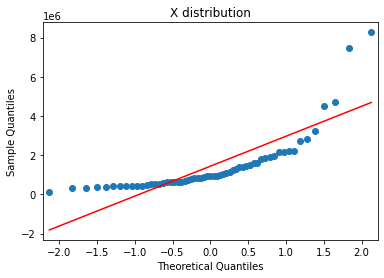

In [245]:
# Importing matplotlib pyplot
import matplotlib.pyplot as plt

# Importing statsmodels lib
import statsmodels.api as sm

# Creating a QQ-plot
sm.qqplot(dfmort['Pop'], line='s')
plt.title("X distribution")
plt.show()

<AxesSubplot:xlabel='RelHum', ylabel='Count'>

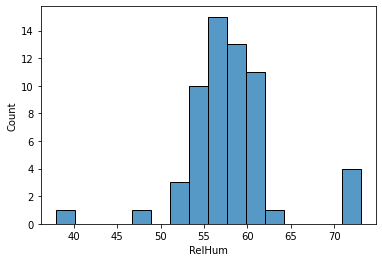

In [157]:
sns.histplot(data=dfmort, x="RelHum")

In [28]:
import numpy as np

n = np.array(list(range(1, 101)))

beta = 0.25
alpha = 0.05
R = 0.5

ppv_atleast = ((1-beta**n)*R)/(R*(1-beta**n) + 1-(1-alpha)**n )
ppv_all = ((R*(1-beta))**n)/((R*(1-beta)+ alpha)**n)

In [29]:
ppv_atleast

array([0.88235294, 0.82781457, 0.77532736, 0.72862805, 0.6882879 ,
       0.65361801, 0.62368938, 0.59766811, 0.57487652, 0.55477675,
       0.53694157, 0.52102875, 0.50676125, 0.49391252, 0.48229552,
       0.47175449, 0.46215861, 0.45339725, 0.44537621, 0.43801475,
       0.43124327, 0.42500149, 0.41923689, 0.41390352, 0.40896101,
       0.40437374, 0.40011014, 0.39614217, 0.39244482, 0.3889957 ,
       0.38577473, 0.38276383, 0.37994669, 0.37730855, 0.37483602,
       0.37251696, 0.37034026, 0.36829584, 0.36637443, 0.36456758,
       0.36286749, 0.36126704, 0.35975962, 0.35833919, 0.35700012,
       0.35573725, 0.35454577, 0.35342123, 0.3523595 , 0.35135676,
       0.35040942, 0.34951417, 0.34866791, 0.34786775, 0.34711099,
       0.34639511, 0.34571776, 0.34507672, 0.34446994, 0.34389546,
       0.34335148, 0.3428363 , 0.3423483 , 0.34188598, 0.34144794,
       0.34103284, 0.34063943, 0.34026652, 0.33991302, 0.33957787,
       0.3392601 , 0.33895876, 0.33867298, 0.33840194, 0.33814

In [30]:
ppv_all

array([8.82352941e-01, 7.78546713e-01, 6.86952982e-01, 6.06134984e-01,
       5.34824986e-01, 4.71904399e-01, 4.16386235e-01, 3.67399619e-01,
       3.24176134e-01, 2.86037766e-01, 2.52386264e-01, 2.22693762e-01,
       1.96494496e-01, 1.73377496e-01, 1.52980144e-01, 1.34982480e-01,
       1.19102188e-01, 1.05090166e-01, 9.27266171e-02, 8.18176033e-02,
       7.21920029e-02, 6.36988261e-02, 5.62048466e-02, 4.95925117e-02,
       4.37580985e-02, 3.86100869e-02, 3.40677238e-02, 3.00597563e-02,
       2.65233144e-02, 2.34029244e-02, 2.06496392e-02, 1.82202699e-02,
       1.60767087e-02, 1.41853312e-02, 1.25164687e-02, 1.10439430e-02,
       9.74465559e-03, 8.59822552e-03, 7.58666957e-03, 6.69412021e-03,
       5.90657666e-03, 5.21168529e-03, 4.59854584e-03, 4.05754045e-03,
       3.58018275e-03, 3.15898478e-03, 2.78733951e-03, 2.45941721e-03,
       2.17007401e-03, 1.91477119e-03, 1.68950399e-03, 1.49073881e-03,
       1.31535778e-03, 1.16060980e-03, 1.02406747e-03, 9.03588947e-04,
      

In [93]:
x = np.array([
    [8,4,7],
    [2,8,1],
    [3,1,1],
    [9,7,4]
])

np.mean(x.T, axis=1)

array([5.5 , 5.  , 3.25])

In [106]:
x = np.array([
    [8,2,3,9],
    [4,8,1,7],
    [7,1,1,4]
])

x

array([[8, 2, 3, 9],
       [4, 8, 1, 7],
       [7, 1, 1, 4]])

In [81]:
np.cov(x.T)

array([[12.33333333,  1.33333333,  8.5       ],
       [ 1.33333333, 10.        ,  0.        ],
       [ 8.5       ,  0.        ,  8.25      ]])

In [83]:
np.cov(x)

array([[12.33333333,  1.33333333,  8.5       ],
       [ 1.33333333, 10.        ,  0.        ],
       [ 8.5       ,  0.        ,  8.25      ]])

In [89]:
x[0][:]@x[0][:].T

129

In [134]:
1/4*(x[:,0].reshape(-1,1)@x[:,0].reshape(-1,1).T + \
    x[:,1].reshape(-1,1)@x[:,1].reshape(-1,1).T + \
        x[:,2].reshape(-1,1)@x[:,2].reshape(-1,1).T +
            x[:,3].reshape(-1,1)@x[:,3].reshape(-1,1).T) - \
            np.mean(x, axis=1).reshape(-1,1)@np.mean(x, axis=1).reshape(-1,1).T
        

array([[9.25  , 1.    , 6.375 ],
       [1.    , 7.5   , 0.    ],
       [6.375 , 0.    , 6.1875]])

In [165]:
y = x.T
y

array([[8, 4, 7],
       [2, 8, 1],
       [3, 1, 1],
       [9, 7, 4]])

In [186]:
y.T@(np.eye(4) - (1/4)*np.ones((4,1))@np.ones((4,1)).T)@y/4

array([[9.25  , 1.    , 6.375 ],
       [1.    , 7.5   , 0.    ],
       [6.375 , 0.    , 6.1875]])

In [187]:
H = (np.eye(3) - (1/3)*np.ones((3,1))@np.ones((3,1)).T)
H

array([[ 0.66666667, -0.33333333, -0.33333333],
       [-0.33333333,  0.66666667, -0.33333333],
       [-0.33333333, -0.33333333,  0.66666667]])

In [209]:
a = np.array([
    [2],
    [10],
    [1]
])

In [214]:
H@a[:,0]*np.ones((3,1))[:,0]

array([-2.33333333,  5.66666667, -3.33333333])

In [191]:
(H@H.T)@a

array([[ 2.33333333],
       [-0.66666667],
       [-1.66666667]])

In [193]:
(H@H@H)@a

array([[ 2.33333333],
       [-0.66666667],
       [-1.66666667]])

In [215]:
u = (1/(np.sqrt(5)))*np.array([[1], [2]])
u    

array([[0.4472136 ],
       [0.89442719]])

In [218]:
u_norm = u/np.linalg.norm(u)
u_norm

array([[0.4472136 ],
       [0.89442719]])

In [225]:
x1 = np.array([[1], [2]])

(u_norm.T@x1)*u_norm

array([[1.],
       [2.]])

In [226]:
x2 = np.array([[3], [4]])

(u_norm.T@x2)*u_norm

array([[2.2],
       [4.4]])

In [227]:
x3 = np.array([[-1], [0]])

(u_norm.T@x3)*u_norm

array([[-0.2],
       [-0.4]])

In [244]:
X = np.array([(u_norm.T@x1)[0][0], (u_norm.T@x2)[0][0], (u_norm.T@x3)[0][0]]).reshape(-1,1)
X

array([[ 2.23606798],
       [ 4.91934955],
       [-0.4472136 ]])

In [247]:
n=X.shape[0]
S = X.T@(np.eye(n) - (1/n)*np.ones((n,1))@np.ones((n,1)).T)@X/n
S

array([[4.8]])

In [242]:
u_norm.T@S

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [250]:
u_norm.T@u_norm

array([[1.]])

In [263]:
sample = np.random.normal(loc=[0,0], scale=[1,1], size=(100,2))

In [264]:
n=sample.shape[0]
S = sample.T@(np.eye(n) - (1/n)*np.ones((n,1))@np.ones((n,1)).T)@sample/n
S

array([[ 0.92898775, -0.09736006],
       [-0.09736006,  0.95900387]])

In [289]:
a=0.39999999999999999999999
np.array([[1], [a]]).T@S@np.array([[1], [a]])-1


array([[0.00454033]])

In [291]:
np.eye(3).T@np.eye(3)-np.eye(3)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [294]:
D = 3*np.eye(3)

In [297]:
np.linalg.det(np.eye(3).T@D@np.eye(3))

27.0

In [304]:
H = np.eye(2) - (1/2)*np.ones((2,1))@np.ones((2,1)).T

In [303]:
np.array([[0, 1],[0,-1]]).T@np.array([[0, 1],[0,-1]])/2

array([[0., 0.],
       [0., 1.]])

In [308]:
H = np.eye(2) - (1/2)*np.ones((2,1))@np.ones((2,1)).T

In [350]:
A = np.array([[1, 0.5],[-1,-0.5]])
#A = np.array([[0, 1],[0,-1]])
#A = np.array([[1, 1],[4,1]])

n = A.shape[0]

S = A.T@A/n

#n=A.shape[0]
#S = A.T@(np.eye(n) - (1/n)*np.ones((n,1))@np.ones((n,1)).T)@A/n
S

S

array([[1.  , 0.5 ],
       [0.5 , 0.25]])

In [351]:
eigenval, eigenvec = np.linalg.eig(S)

In [352]:
eigenval

array([1.25, 0.  ])

In [354]:
eigenvec/0.4472136

array([[ 1.99999998, -0.99999999],
       [ 0.99999999,  1.99999998]])

In [363]:
y1 = eigenvec[:,0].reshape(-1,1).T@A[0,:].reshape(-1,1)
y1

array([[1.11803399]])

In [364]:
y2 = eigenvec[:,0].reshape(-1,1).T@A[1,:].reshape(-1,1)
y2

array([[-1.11803399]])

In [2]:
import numpy as np

In [7]:
x1 = np.array([[0], [2]])
x2 = np.array([[1], [-1]])
x3 = np.array([[-1], [-1]])

A = np.array([[0, 2], [1,-1], [-1,-1]])

n = A.shape[0]

S = A.T@(np.eye(n) - (1/n)*np.ones((n,1))@np.ones((n,1)).T)@A/n

S

array([[ 6.66666667e-01,  0.00000000e+00],
       [-7.40148683e-17,  2.00000000e+00]])

In [10]:
S = A.T@A/n

S

array([[0.66666667, 0.        ],
       [0.        , 2.        ]])

In [11]:
eigenval, eigenvec = np.linalg.eig(S)

In [12]:
eigenval

array([0.66666667, 2.        ])

In [13]:
eigenvec

array([[1., 0.],
       [0., 1.]])

In [14]:
x1.T@np.array([[0], [1]])

array([[2]])

In [15]:
x2.T@np.array([[0], [1]])

array([[-1]])

In [16]:
x3.T@np.array([[0], [1]])

array([[-1]])

In [18]:
x1 = np.array([[0], [2]])
x2 = np.array([[0], [-2]])
x3 = np.array([[1], [1]])
x4 = np.array([[-1], [-1]])

A = np.array([[0, 2], [0,-2], [1,1], [-1,-1]])

n = A.shape[0]

S = A.T@(np.eye(n) - (1/n)*np.ones((n,1))@np.ones((n,1)).T)@A/n

S

array([[0.5, 0.5],
       [0.5, 2.5]])

In [19]:
eigenval, eigenvec = np.linalg.eig(S)

In [20]:
eigenval

array([0.38196601, 2.61803399])

In [25]:
eigenvec

array([[-0.97324899, -0.22975292],
       [ 0.22975292, -0.97324899]])

In [44]:
(np.concatenate([eigenvec[:,1].reshape(-1,1), eigenvec[:,0].reshape(-1,1)], axis=1)@x1).T

array([[-1.94649798,  0.45950584]])

In [32]:
x1.T@eigenvec[:,1]*eigenvec[:,1]

array([0.4472136 , 1.89442719])

In [37]:
np.sum(eigenvec**2, axis=1)

array([1., 1.])

In [46]:
X = np.array([[1,1], [1, -1], [-1,1]])

B = X@X.T

B

array([[ 2,  0,  0],
       [ 0,  2, -2],
       [ 0, -2,  2]])

In [47]:
eigenval, eigenvec = np.linalg.eig(B)

In [48]:
eigenval

array([4.0000000e+00, 4.4408921e-16, 2.0000000e+00])

In [49]:
eigenvec

array([[ 0.        ,  0.        ,  1.        ],
       [-0.70710678,  0.70710678,  0.        ],
       [ 0.70710678,  0.70710678,  0.        ]])

In [52]:
eigenvec[:,0]/np.linalg.norm(eigenvec[:,0])

array([ 0.        , -0.70710678,  0.70710678])

In [56]:
eigenvec[:,0].reshape(-1,1)*(4**-.5)

array([[ 0.        ],
       [-0.35355339],
       [ 0.35355339]])

In [3]:
import numpy as np

In [7]:
k = 1  - ((2*np.exp(1) + 1)/3)*np.exp((-2*np.exp(1)/(1+2*np.exp(1))))

In [10]:
np.sqrt(k/(1-4*k))

0.33683796580865194

In [11]:
k = 3*np.exp(1)/(2*np.exp(1) + 1)

a = np.sqrt((k-1)/(4-3*k))

a

1.1578463418420823

In [13]:
(0*np.log(0.49) + 1*np.log(0.51))/(np.log(0.49) + np.log(0.51))

0.4855752884605294

In [20]:
S = np.array([[1, 1], [1, -1]])@np.array([[2, 0], [0, 1]])@np.array([[1, 1], [1, -1]])/2
S

array([[1.5, 0.5],
       [0.5, 1.5]])

In [23]:
E, P = np.linalg.eig(S)

In [33]:
P.T@S@P

array([[1., 0.],
       [0., 1.]])

In [31]:
P = (1/np.sqrt(2))*np.array([[1, 1], [1, -1]])@(np.linalg.inv(np.array([[2, 0], [0, 1]]))**0.5)

In [32]:
P

array([[ 0.5       ,  0.70710678],
       [ 0.5       , -0.70710678]])

In [34]:
P.T@P

array([[0.5, 0. ],
       [0. , 1. ]])

In [40]:
x11 = np.array([[0],[0]])
x12 = np.array([[2],[0]])
mu1 = 0.5*(x11 + x12)

x21 = np.array([[6],[-3]])
x22 = np.array([[8],[-3]])
mu2 = 0.5*(x21 + x22)

n1 = 2
n2 = 2

s1 = 0
for xi in [x11, x12]:
    for xj in [x21, x22]:
        s1 += np.linalg.norm(xi - xj)**2
s1/(n1*n2)

47.0

In [41]:
s1 = 0
for xi in [x11, x12]:
    for xj in [x21, x22]:
        s1 += np.linalg.norm((xi - mu1) + (mu1 - mu2) - (xj - mu2))**2
s1/(n1*n2)

47.0

In [42]:
s1 = 0
for xi in [x11, x12]:
    for xj in [x21, x22]:
        s1 += np.linalg.norm(xi - mu1)**2 + np.linalg.norm(mu1 - mu2)**2 + np.linalg.norm(xj - mu2)**2
s1/(n1*n2)

47.00000000000001

In [43]:
s1 = 0
for xi in [x11, x12]:
    for xj in [x21, x22]:
        s1 += np.linalg.norm(mu1 - mu2)**2
s1/(n1*n2)

45.00000000000001